In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset/auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

In [3]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
# 데이터 전처리
# horsepower 숫자로 변경 
# '?' -> Nan으로 대체
df['horsepower'].replace('?', np.nan, inplace=True) 
df.dropna(subset=['horsepower'], axis=0, inplace=True)
# Nan 데이터 삭제
df['horsepower'] = df['horsepower'].astype('float') 

In [6]:
# 분석에 사용할 컬럼 선택
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

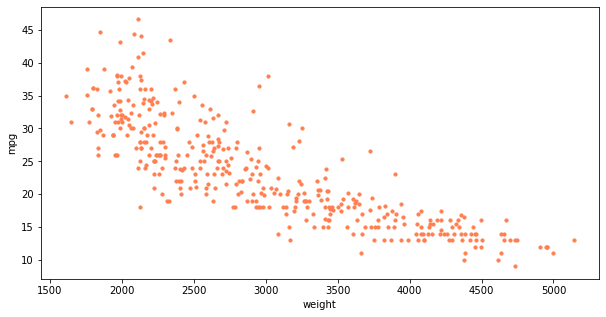

In [7]:
ndf.plot(kind='scatter', x='weight', y='mpg',  
         c='coral', s=10, figsize=(10, 5))
plt.show()

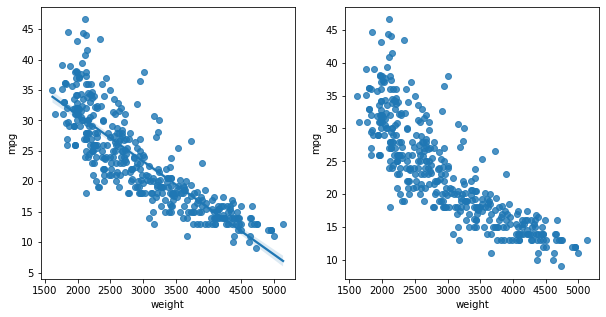

In [8]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)                 # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)  #회귀선 미표시
plt.show()

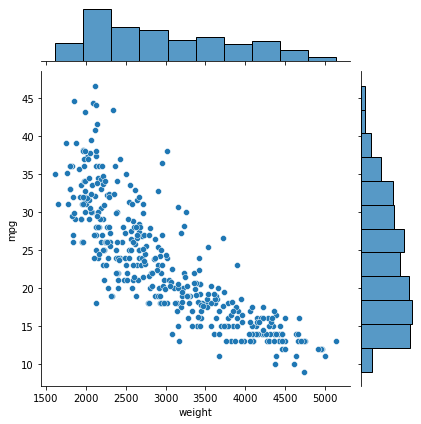

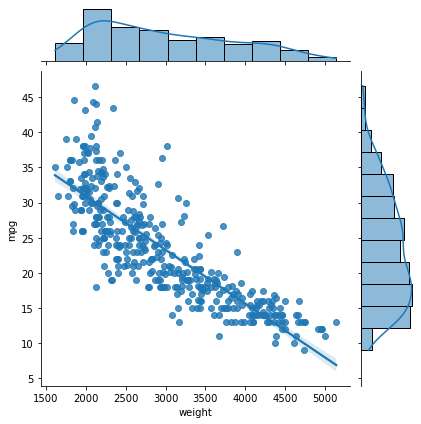

In [9]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf)              # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)  # 회귀선 표시
plt.show()

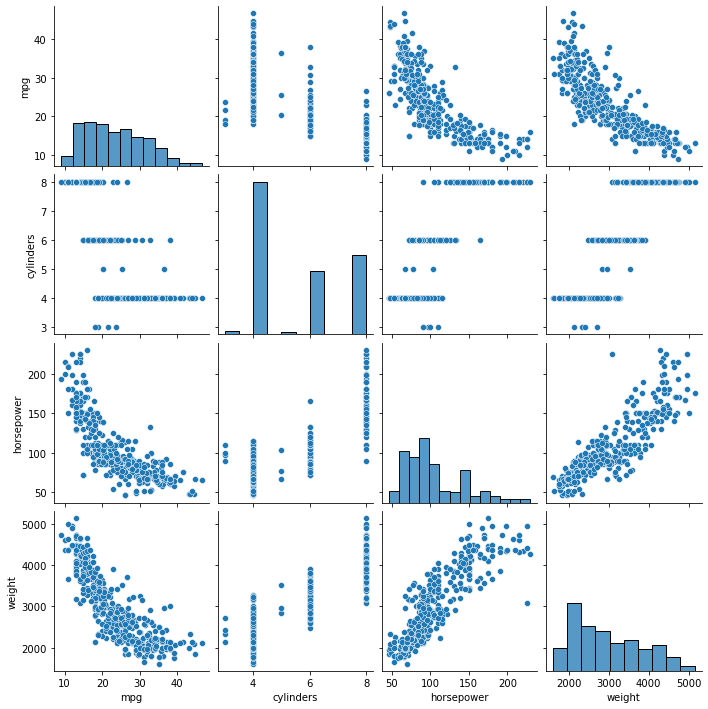

In [10]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)  
plt.show()

In [11]:
'''
Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']       #종속 변수 Y


In [12]:
# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값 

In [13]:
print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))


train data 개수:  274
test data 개수:  118


In [14]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   
# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)

0.6822458558299325


In [16]:
# 회귀식의 기울기
print('기울기 a: ', lr.coef_)
print()

# 회귀식의 y절편
print('y절편 b', lr.intercept_)
print()

기울기 a:  [-0.00775343]

y절편 b 46.710366257280086



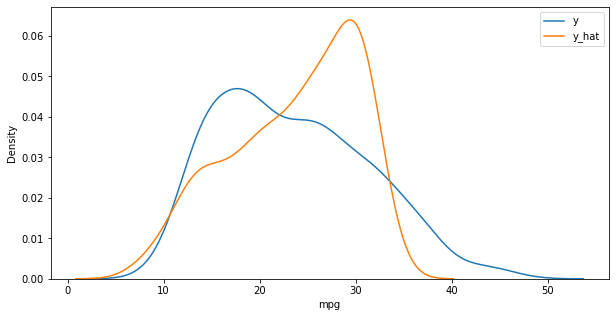

In [17]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()